# Plot Micrium Results
## Both filters and current controllers

1st - General Packages For Ploting and DSP

In [1]:
using CSV
using DataFrames
using FFTW
using Plots,Measures
using LaTeXStrings

theme(:bright)
plot_font = "Computer Modern"
default(fontfamily=plot_font,linewidth=2, framestyle=:box, label=nothing, grid=false)
scalefontsizes(1.05)


(process:18284): GLib-GIO-WARNING **: 14:41:40.929: Unexpectedly, UWP app `draw.io.draw.ioDiagrams_19.0.3.0_x64__1zh33159kp73c' (AUMId `draw.io.draw.ioDiagrams_1zh33159kp73c!draw.io.draw.ioDiagrams') supports 2 extensions but has no verbs


2nd - File Selection Procedure

2.1 - Oscilloscope Files (For Loop)

In [2]:
FileNumber = 003;
FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\Oscilloscope_Record_" * string(FileNumber,base = 10,pad = 3) * ".csv"
#FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\StepResponse.csv"
#FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\Oscilloscope_Record_Up.csv"
#FilePathType = "CSVs\\Oscilloscope_Record_000_MULTI_REF_MOD_PI_WORKING.csv"
#FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\Plots\\Parameter_Rs_w_PI.csv"
#FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\Plots\\Parameter_L.csv"
#FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\Plots\\Parameter_L_Lm_Rr_1_w_PI.csv"
Data = DataFrame(CSV.File(FilePathType,header = 1, delim = ","));
names(Data)

9-element Vector{String}:
 "Time (seconds)"
 "Controller.Vd_Ref"
 "Controller.Vq_Ref"
 "Ic"
 "Controller.Id_Ref"
 "Controller.Iq_Ref"
 "Controller.Id"
 "Controller.Iq"
 "V_DC"

2.1.1 - DQ Current and reference plot

In [3]:
Time = Data."Time (seconds)";

IdRef = Data."Controller.Id_Ref";
Id = Data."Controller.Id";
IqRef = Data."Controller.Iq_Ref";
Iq = Data."Controller.Iq";

p1 = plot(Time,Id, label = "Id");
p1 = plot!(Time,IdRef,label = "Id Reference");
p1 = plot!(title = "DQ currents and corresponding references");
p1 = plot!(ylabel = "Current (A)");

p1 = plot!(Time,Iq, label = "Iq");
p1 = plot!(Time,IqRef, label = "Iq Reference");
p1 = plot!(xlabel = "Time (s)");
p1 = plot!(ylabel = "Currents (A)");

plot(p1,xguidefontsize=11,yguidefontsize=11)
plot!(size = (700,390))
#plot(p1,p2,layout = (2,1))
plot!(fmt = :pdf)
savefig("C:\\Users\\Rui Mendes\\Desktop\\Plots\\MastersThesis\\Graphs\\Chapter-7\\L_LOAD_CHANGING_REF.pdf");

2.1.2 - Error or overshoot lost of control plots

In [4]:
# Error Plot for documentations
Time = Data."Time (seconds)";

p3 = plot(Time,Data."Controller.Vd_Ref",label = "PI Output D");
p3 = plot!(Time,Data."Controller.Vq_Ref",label = "PI Output Q");
p3 = plot!(xlabel = "Time (s)");
p3 = plot!(ylabel = "Voltages (p.u.)");

plot(p3,xguidefontsize=11,yguidefontsize=11)
plot!(size = (700,390))
plot!(fmt = :pdf)
savefig("C:\\Users\\Rui Mendes\\Desktop\\Plots\\MastersThesis\\Graphs\\Chapter-7\\L_LOAD_CHANGING_REF_OUTPUT_PI.pdf");

In [5]:
Time = Data."Time (seconds)";
VdRef = Data."Controller.Vd_Ref" .* Data."V_DC";
VqRef = Data."Controller.Vq_Ref" .* Data."V_DC";
Id = Data."Controller.Id";
Iq = Data."Controller.Iq";

P = 0.5*(VdRef.*Id + VqRef.*Iq);
Q = 0.5*(VqRef.*Id - VdRef.*Iq);

p1 = plot(Time,P,label = "Real Power (W)");
p1 = plot!(Time,Q,label = "Reactive Power (VAR)");
p1 = plot!(Time,sqrt.(P.^2 + Q.^2),label = "Aparent Power (VA)")
p1 = plot!(ylabel = "Power");

p2 = plot(Time,(P./sqrt.(P.^2 + Q.^2)));
p2 = plot!(ylabel = "Power Factor");
p2 = plot!(ylims = (0.5,1.5));

p3 = plot(Time,acos.(P./sqrt.(P.^2 + Q.^2)).*180/pi);
p3 = plot!(ylims = (0,180));
p3 = plot!(ylabel = L"cos^{-1}(Power Factor)");
p3 = plot!(xlabel = "Time (s)");

plot(p1,p2,p3, layout = (3,1))
plot!(size = (700,500))
plot!(fmt = :pdf)
savefig("C:\\Users\\Rui Mendes\\Desktop\\Plots\\MastersThesis\\Graphs\\Chapter-7\\L_LOAD_CHANGING_ref_POWER.pdf");

2.2 - Micrium CSV Files (For Loop) (buggie)

In [11]:
FileNumber = 18;
FilePathType = "C:\\Users\\Rui Mendes\\Desktop\\MicriumTest_" * string(FileNumber,base = 10,pad = 3) * ".csv"

Data = DataFrame(CSV.File(FilePathType,header = 1, delim = ","));
names(Data)

9-element Vector{String}:
 "Date Time"
 "Id_Ref"
 "Iq_Ref"
 "Id"
 "Iq"
 "Vd_Ref"
 "Vq_Ref"
 "AuxD"
 "AuxQ"

## Parameter Estimation Stuff

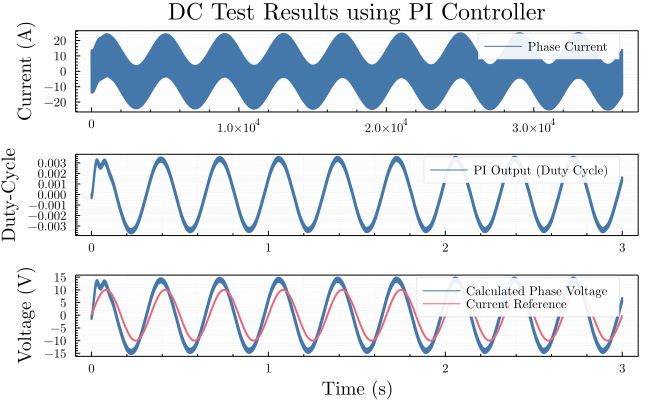

In [27]:
Time = Data.Time;
Duty = Data.DutyCycle*0.5;
p1 = plot(Data.Ia2,label = "Phase Current");
p1 = plot!(ylabel = "Current (A)");
p1 = plot!(title = "DC Test Results using PI Controller");

p2 = plot(Time,Duty,label = "PI Output (Duty Cycle)");
p2 = plot!(ylabel = "Duty-Cycle");

p3 = plot(Time,Duty.*415 .*10,label = "Calculated Phase Voltage");
p3 = plot!(Time,Data.V24,label = "Current Reference");
p3 = plot!(ylabel = "Voltage (V)");
p3 = plot!(xlabel = "Time (s)");

plot(p1,p2,p3,layout=(3,1))
#plot!(xlim = (0,1.5))
plot!(size = (650,400))
plot!(fmt = :pdf)
#savefig("C:\\Users\\Rui Mendes\\Desktop\\Plots\\MastersThesis\\Graphs\\Chapter-5\\RsResult.pdf")



#p4 = plot(Time,Duty.*415 ./ Data.Ia2 .* 0.5);
#p4 = plot!(title = L"Calculated \: R_s Value");
#plot(p4,xlim = (0,1.5))
#plot!(ylim = (0,0.2))
#plot!(size = (650,400))
#plot!(fmt = :pdf)
#savefig("C:\\Users\\Rui Mendes\\Desktop\\Plots\\MastersThesis\\Graphs\\Chapter-5\\RsCalc.pdf")


#Rs = Duty.*415 ./ Data.Ia2 .* 0.5;
#Time[6000]
#Rs[6000]



In [6]:
Time = Data.Time;

plot(Time,Data.Ia2,label = "Phase Current (A)")
plot!(Time,Data.Vab2,label = "Phase Voltage (V)")
plot!(xlim = (0.0,0.06))
plot!(title = "Leakage inductance test")
plot!(xlabel = "Time(s)")
plot!(ylabel = "Current (A) / Voltage (V)")
plot!(size = (650,400))
plot!(fmt = :pdf)
savefig("C:\\Users\\Rui Mendes\\Desktop\\Plots\\MastersThesis\\Graphs\\Chapter-5\\LResult.pdf")